# Importing the Dependencies


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



# Data Collection and Processing


In [19]:
car_dataset = pd.read_csv ('/content/car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
car_dataset.shape

(301, 9)

In [21]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [23]:
# check the distribution of categorical data
print (car_dataset.Fuel_Type.value_counts())
print (car_dataset.Transmission.value_counts())
print (car_dataset.Seller_Type.value_counts())
print (car_dataset.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [24]:
# encoding Fuel_Type Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding Seller_Type Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding Transmission Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.head()

/tmp/ipython-input-1880447455.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-1880447455.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-1880447455.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Spletting data into Training data and Test Data

In [25]:
X=car_dataset.drop(['Car_Name','Selling_Price' ],axis=1)
Y=car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [26]:
# Splitting into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Training

In [27]:
# Linear Regression
lin_reg_model= LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation


In [32]:
training_data_prediction = lin_reg_model.predict(X_train)

In [34]:
#  R squared Error
error_score = metrics.r2_score (Y_train , training_data_prediction)
print ( "R squared Error " , error_score)
# for regression problems we yse R squared

R squared Error  0.8799451660493711


# Visualize the actual prices and predicted prices

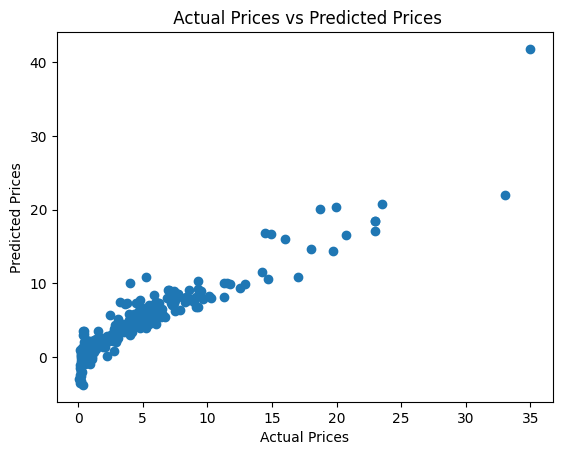

In [35]:
plt.scatter (Y_train , training_data_prediction)
plt.xlabel ("Actual Prices")
plt.ylabel ("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
test_data_prediction = lin_reg_model.predict(X_test)

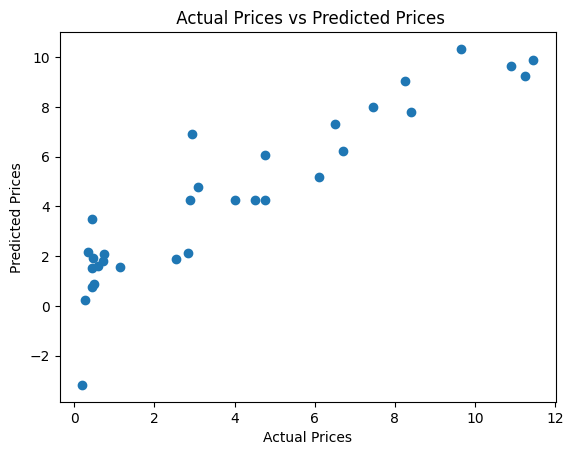

In [39]:
plt.scatter (Y_test , test_data_prediction)
plt.xlabel ("Actual Prices")
plt.ylabel ("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [40]:
#  R squared Error
error_score = metrics.r2_score (Y_test , test_data_prediction)
print ( "R squared Error " , error_score)
# for regression problems we yse R squared

R squared Error  0.8365766715027051


# Lasso Regression

In [41]:
# Lasso Regression
lass_reg_model= Lasso()
lass_reg_model.fit(X_train,Y_train)
training_data_prediction = lass_reg_model.predict(X_train)



In [42]:
error_score = metrics.r2_score (Y_train , training_data_prediction)
print ( "R squared Error " , error_score)
# for regression problems we yse R squared

R squared Error  0.8427856123435794


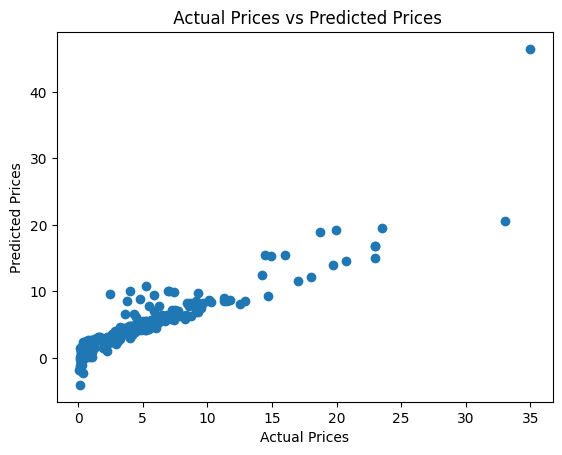

In [43]:
plt.scatter (Y_train , training_data_prediction)
plt.xlabel ("Actual Prices")
plt.ylabel ("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

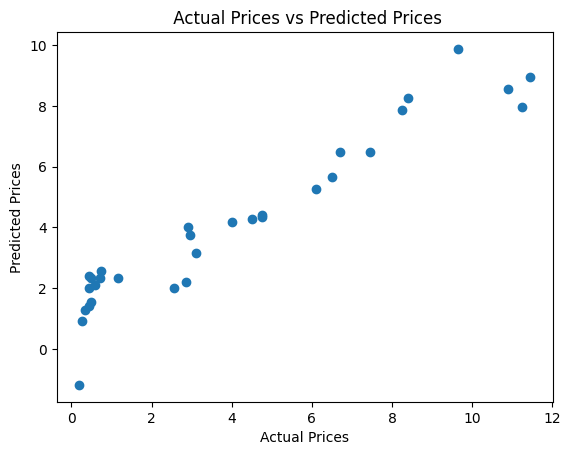

In [45]:
test_data_prediction = lass_reg_model.predict(X_test)
plt.scatter (Y_test , test_data_prediction)
plt.xlabel ("Actual Prices")
plt.ylabel ("Predicted Prices")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [46]:
error_score = metrics.r2_score (Y_train , training_data_prediction)
print ( "R squared Error " , error_score)
# for regression problems we yse R squared

R squared Error  0.8427856123435794
